In [39]:
import pandas as pd

In [40]:
df=pd.read_csv("train.csv")

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [43]:
df.shape

(614, 13)

## Data Cleaning


### Checking for Missing Values

In [44]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Missing values in LoanAmount and Credit_History

In [45]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [46]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [47]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Drop out all the missing value remaing for avoid disturbance in the model

In [55]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace= True)
df['Married'].fillna(df['Married'].mode()[0],inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace= True)


In [56]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
df.shape

(614, 13)

#### Checking for Missing Value

In [60]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [61]:
#final Data shape

df.shape

(614, 13)

### Exploratory Data Analysis

#### Comparison between Parameters in getting the Loan

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

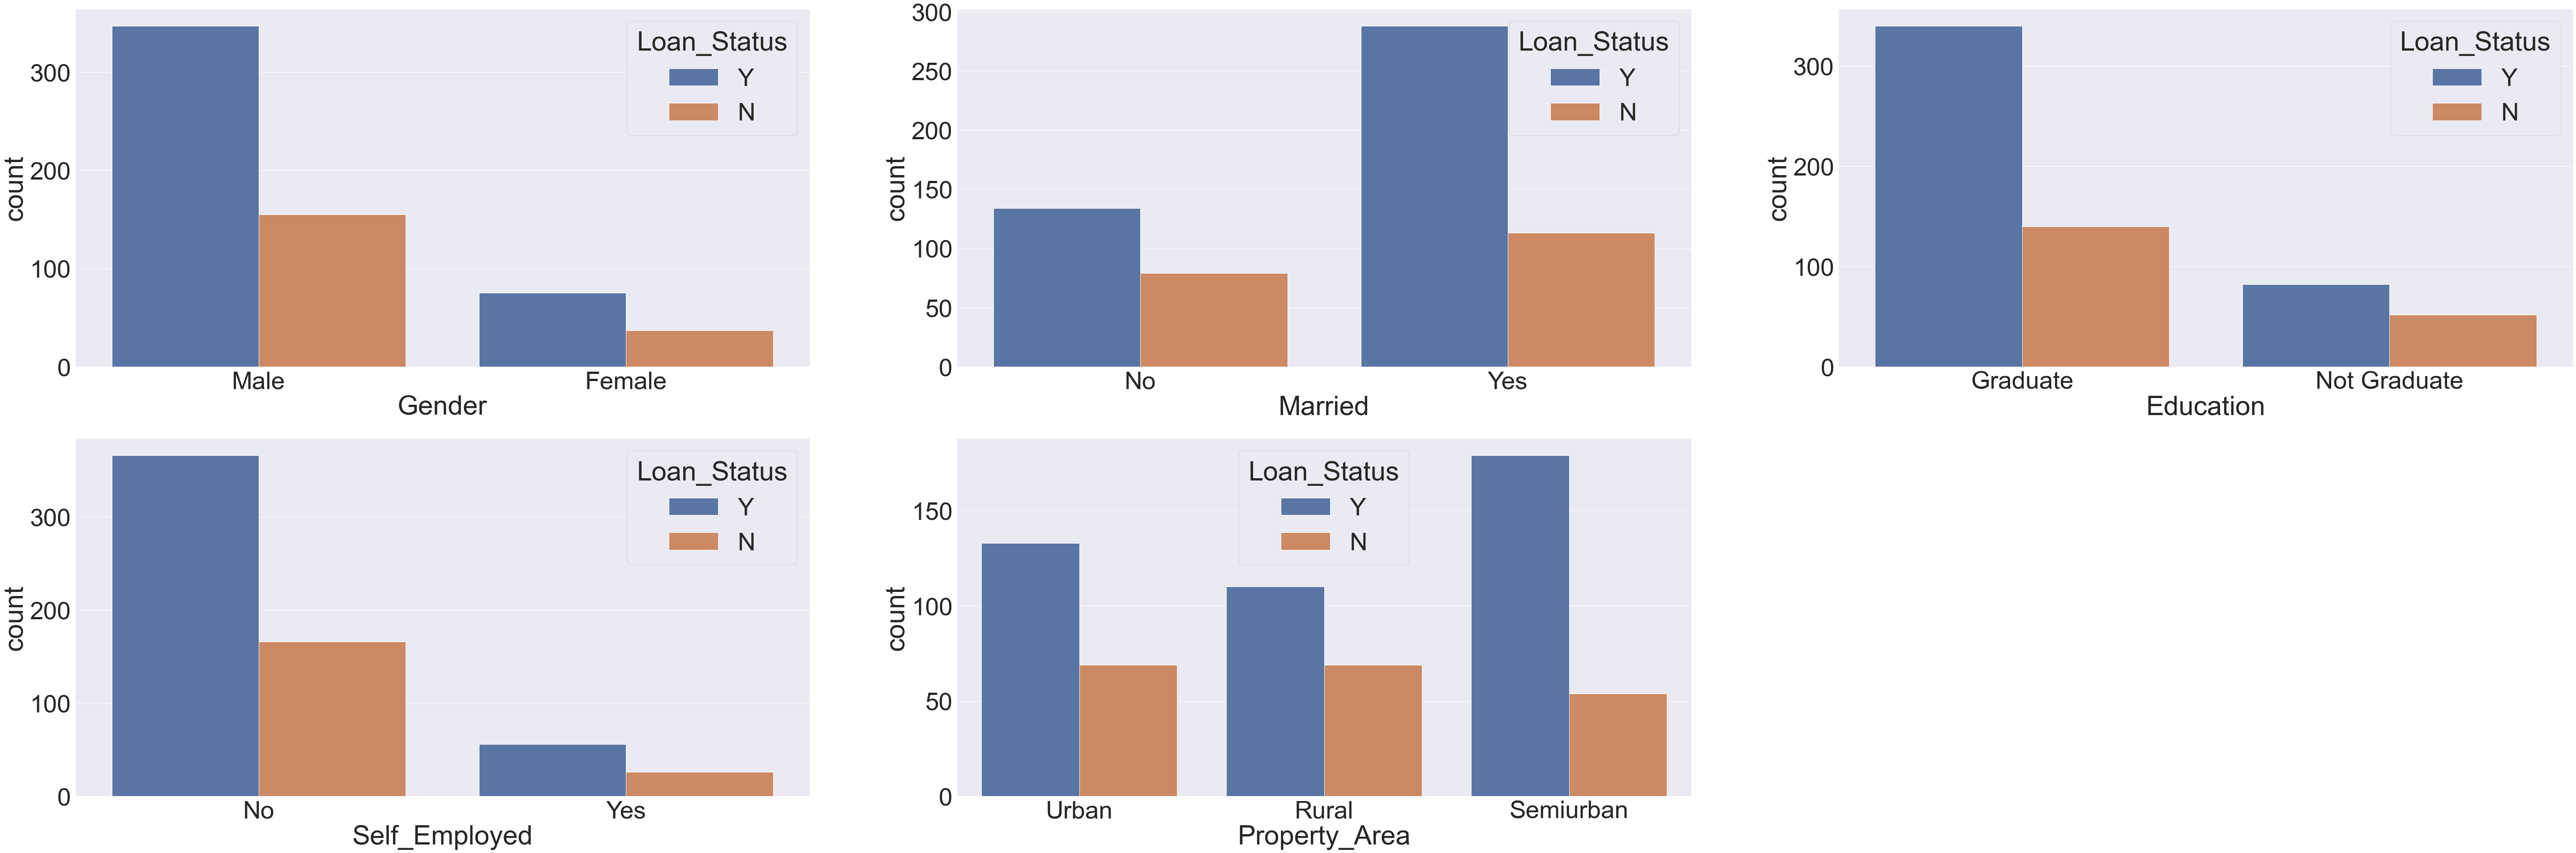

In [63]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])



### Replace the variable value to numeric form & Display the Value counts

#### Data in numeric form helps to do logistic regression to build model

In [64]:
df['Loan_Status'].replace('Y',1,inplace= True)
df['Loan_Status'].replace('N',0,inplace= True)

In [65]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [66]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [67]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [68]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [69]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [70]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [71]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [72]:
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [73]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [74]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [75]:
#Final Data Frame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Importing Packages for Classification Algorithm

In [76]:
#We will use Classification model with Logistic Regression Algorithm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Spliting the Data into two sets : Train and Test Data

In [77]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [79]:
print(X_train)

[[  1.   0.   0. ... 360.   1.   1.]
 [  0.   0.   0. ... 360.   1.   0.]
 [  1.   1.   3. ... 180.   0.   1.]
 ...
 [  1.   1.   2. ... 360.   1.   2.]
 [  0.   0.   1. ... 360.   1.   1.]
 [  1.   0.   0. ... 360.   1.   1.]]


In [80]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

score = model.score(X_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

Logistic Regression accuracy =  0.803680981595092
accuracy_score overall : 0.7962962962962963
accuracy_score percent : 79.63


In [81]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
y_test [1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0]


In [82]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

In [83]:
model_rfc.fit(X_train,y_train)
y_pred = model_rfc.predict(X_test)

In [84]:
score = model_rfc.score(X_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))
print('RFC accuracy = ', metrics.accuracy_score(y_pred,y_test))

accuracy_score overall : 1.0
accuracy_score percent : 100.0
RFC accuracy =  0.7914110429447853


In [85]:
print("y_predicted",y_pred)
print("y_test",y_test)

y_predicted [1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
y_test [1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0]
